# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Pinasthika Sekar Wintang
- **Email:** pswintang17@gmail.com
- **ID Dicoding:** pinasthikasw

## Menentukan Pertanyaan Bisnis


- Apakah terdapat perbedaan pola penyewaan sepeda antara penyewa non-registrasi dan penyewa terregistrasi?
- Apakah jumlah penyewa sepeda dipengaruhi oleh kondisi cuaca? Apakah cuaca tertentu berpengaruh secara signifikan terhadap jumlah penyewa sepeda?
- Apakah terdapat pola penyewaan sepeda yang berbeda antara musim semi, musim panas, musim gugur, dan musim dingin?

## Import Semua Packages/Library yang Digunakan

In [5]:
# memanggil semua library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [6]:
# memuat tabel hour dari data Bike Sharing Dataset
hour_df = pd.read_csv("hour.csv")
hour_df.head(len(hour_df))

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Assessing Data

Memeriksa data hour_df untuk mengidentifikasi masalah yang terdapat di dalamnya, seperti _missing value_, _invalid value_, _duplicate data_, _innacurate value_, _inconsistent value_, atau pun _outlier_ serta memastikan data tersebut berkualitas.

In [7]:
# memeriksa tipe data dari tiap kolom yang terdapat dalam hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Terdapat kesalahan tipe data untuk kolom **"dteday"** yang seharusnya direpresentasikan sebagai tipe data **datetime**, bukan object. Hal ini karena tipe data datetime mengacu pada representasi objek tanggal dan waktu, sedangkan tipe data object digunakan untuk tipe data string.

Berdasarkan jumlah data dari setiap kolom, terlihat tidak ada data yang hilang (_missing value_). Untuk memastikannya, dijalankan kode berikut. 

In [8]:
# memastikan tidak terdapat missing value pada hour_df
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# memeriksa duplikasi pada hour_df
print("Jumlah duplikasi: ",hour_df.duplicated().sum())


Jumlah duplikasi:  0


Tidak terdapat duplikasi data pada hour_df.

In [10]:
# memeriksa ringkasan parameter statistik dari kolom numerik pada hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak terdapat keanehan nilai pada hour_df. 

### Cleaning Data

Membersihkan masalah pada hour_df yang telah teridentifikasi dalam proses _assessing data_.

In [11]:
# mengganti tipe data pada kolom dteday menjadi datetime
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

Untuk memastikan tipe data berhasil diganti ke datetime, dijalankan kode berikut.

In [12]:
# memastikan berhasil mengganti tipe data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Masalah pada data sudah teratasi. Namun, beberapa nama kolom pada tabel hour_df terlihat cukup sulit dipahami sehingga perlu diganti terlebih dahulu agar dapat lebih mewakili isi data yang terkandung di dalamnya.

In [13]:
# mengganti nama kolom yang sulit dipahami
hour_df = hour_df.rename(columns={'dteday': 'date_time', 'yr': 'year', 'mnth': 'month',
                                'hr': 'hour', 'holiday': 'is_holiday', 'weekday': 'is_weekday',
                                'workingday': 'is_working_day','weathersit': 'weather_condt',
                                'atemp': 'feeling_temp', 'hum': 'humid', 'windspeed': 'wind_speed', 
                                'cnt': 'total_count'})
hour_df.head()

,instant,date_time,season,year,month,hour,is_holiday,is_weekday,is_working_day,weather_condt,temp,feeling_temp,humid,wind_speed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore hour_df

Mengeksplorasi informasi-informasi yang termuat dalam data hour_df.

In [14]:
# melihat ringkasan parameter statistik dari data hour_df
hour_df.describe(include="all")

,instant,date_time,season,year,month,hour,is_holiday,is_weekday,is_working_day,weather_condt,temp,feeling_temp,humid,wind_speed,casual,registered,total_count
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


1. Melihat jumlah penyewaan sepeda per kategori penyewa untuk melihat pola penyewaan.

In [43]:
# menghitung persentase jumlah penyewa non-registrasi dan terregistrasi
total_casual = hour_df['casual'].sum()
total_registered = hour_df['registered'].sum()

total_count = hour_df['total_count'].sum()

percentage_casual = (total_casual / total_count) * 100
percentage_registered = (total_registered / total_count) * 100

print("Total non_registered users:", total_casual, "or %1.2f%%" % percentage_casual)
print("Total regestered users:", total_registered, "or %1.2f%%" % percentage_registered)

Total non_registered users: 620017 or 18.83%
Total regestered users: 2672662 or 81.17%


In [16]:
# melakukan pengelompokan jumlah penyewa non-registrasi, terregistrasi, dan totalnya berdasarkan tahun
hour_df["year"] = hour_df["year"].replace({0: 2011, 1: 2012})
hour_df.groupby(by="year").agg({
    "casual": ["sum", "mean"],
    "registered": ["sum", "mean"],
     "total_count": ["sum", "mean"]
})

casual            registered             total_count            
         sum       mean        sum        mean         sum        mean
year                                                                  
2011  247252  28.600578     995851  115.193869     1243103  143.794448
2012  372765  42.679757    1676811  191.986604     2049576  234.666361

In [17]:
# melakukan pengelompokan jumlah penyewa non-registrasi, terregistrasi, dan totalnya berdasarkan bulan
hour_df.groupby(by="month").agg({
    "casual": ["sum", "mean"],
    "registered": ["sum", "mean"],
     "total_count": ["sum", "mean"]
})

casual            registered             total_count            
         sum       mean        sum        mean         sum        mean
month                                                                 
1      12042   8.426872     122891   85.997901      134933   94.424773
2      14963  11.158091     136389  101.706935      151352  112.865026
3      44444  30.172437     184476  125.238289      228920  155.410726
4      60802  42.311761     208292  144.949200      269094  187.260960
5      75285  50.594758     256401  172.312500      331686  222.907258
6      73906  51.323611     272436  189.191667      346342  240.515278
7      78157  52.524866     266791  179.295027      344948  231.819892
8      72039  48.840000     279155  189.257627      351194  238.097627
9      70323  48.937370     275668  191.835769      345991  240.773138
10     59760  41.185389     262592  180.973122      322352  222.158511
11     36603  25.471816     218228  151.863605      254831  177.335421
12     21693  14.627782     189343  127.675657      211036  142.303439

2. Melihat jumlah penyewaan berdasarkan kondisi cuaca untuk melihat pengaruh cuaca terhadap jumlah penyewaan.

In [18]:
# melakukan pengelompokan jumlah penyewaan berdasarkan setiap kategori kondisi cuaca
hour_df.groupby(by="weather_condt").agg({
     'total_count': ['sum', 'mean']
})

total_count            
                      sum        mean
weather_condt                        
1                 2338173  204.869272
2                  795952  175.165493
3                  158331  111.579281
4                     223   74.333333

3. Melihat jumlah penyewaan berdasarkan musim untuk melihat pola penyewaan sepeda pada musim semi, musim panas, musim gugur, dan musim dingin.

In [19]:
# melakukan pengelompokan jumlah penyewaan harian berdasarkan setiap kategori musim
hour_df.groupby(by=["is_weekday", "season"]).agg({
     'total_count': ['sum', 'mean']
})

total_count            
                          sum        mean
is_weekday season                        
0          1            60195   94.349530
           2           129650  208.105939
           3           138431  224.361426
           4           115751  185.498397
1          1            63771  104.200980
           2           123255  191.389752
           3           146307  234.842697
           4           122170  203.616667
2          1            69813  122.264448
           2           125449  201.040064
           3           152715  236.035549
           4           121132  198.252046
3          1            65277  112.159794
           2           130547  202.085139
           3           158054  243.910494
           4           119170  198.948247
4          1            72355  125.181661
           2           135207  216.677885
           3           159561  237.795827
           4           118272  197.779264
5          1            74264  120.754472
           2           135792  217.615385
           3           155267  239.609568
           4           122467  204.111667
6          1            65673  101.660991
           2           138689  222.258013
           3           150794  234.881620
           4           122651  204.418333

In [20]:
# melakukan pengelompokan jumlah penyewaan per jam berdasarkan setiap kategori musim
hour_df.groupby(by=["hour", "season"]).agg({
     'total_count': ['sum', 'mean']
})

total_count            
                    sum        mean
hour season                        
0    1             4878   27.404494
     2            10459   56.842391
     3            13822   73.914439
     4             9971   56.333333
1    1             3229   18.140449
...                 ...         ...
22   4            21871  123.564972
23   1             7994   44.411111
     2            17661   95.983696
     3            22986  122.919786
     4            15300   86.440678

[96 rows x 2 columns]

## Visualization & Explanatory Analysis

In [22]:
# mengatur canvas plot

# mengatur gaya plot
sns.set_style('whitegrid')

# mengatur gaya kontek plot
sns.set_context('paper')

# membuat dictionary parameter untuk mengatur ukuran setiap elemen plot
parameter = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 7),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(parameter)

### Pertanyaan 1:
Apakah terdapat perbedaan pola penyewaan sepeda antara penyewa non-registrasi dan penyewa terregistrasi?

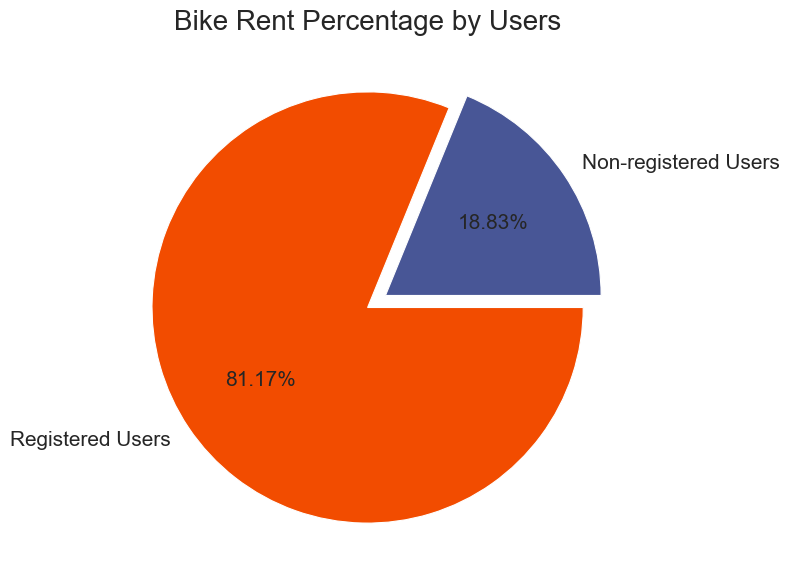

In [44]:
plt.figure(figsize=(7, 7))
users = ('Non-registered Users', 'Registered Users')
votes = (hour_df.casual.sum(), hour_df.registered.sum())
 
plt.pie(
    x=votes,
    labels=users,
    textprops={'fontsize': 15},
    autopct='%1.2f%%',
    colors=('#485696', '#F24C00'),
    explode=(0.1, 0)
)
plt.title("Bike Rent Percentage by Users", size=20)
plt.show()

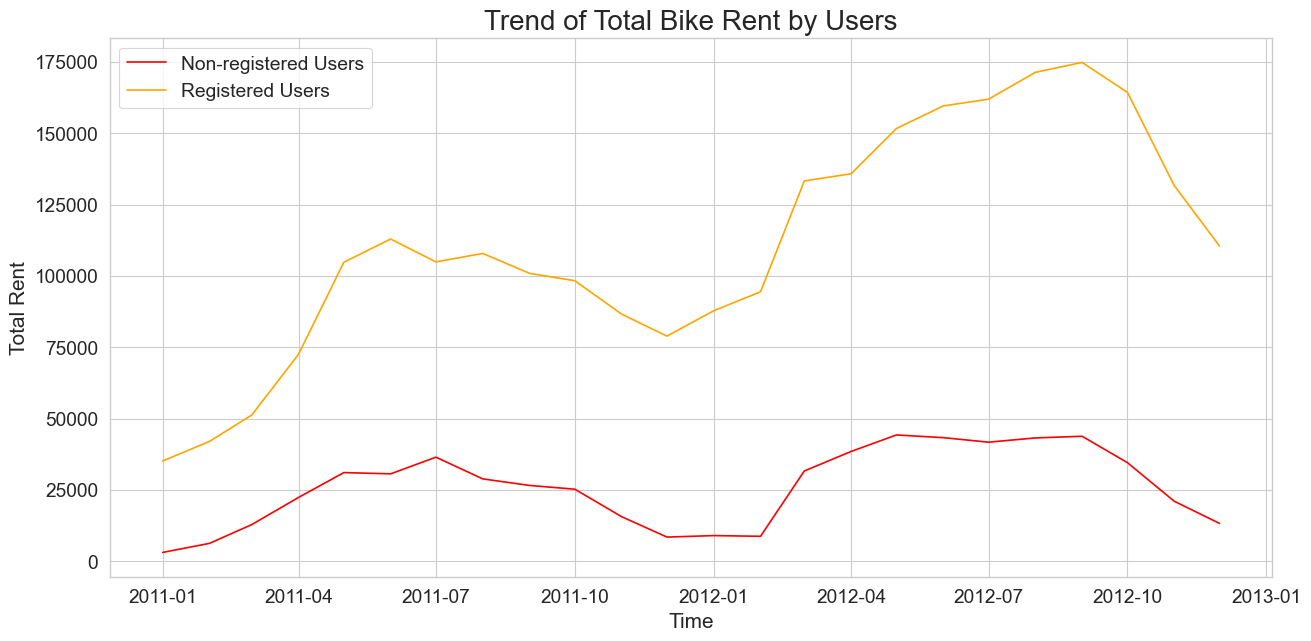

In [45]:
# menggabungkan tahun dan bulan menjadi satu kolom dengan tipe datetime
hour_df['date_time'] = pd.to_datetime(hour_df['year'].astype(str) + '-' + hour_df['month'].astype(str))

# mengelompokkan data berdasarkan bulan dan total sewa untuk setiap kategori penyewa
monthly_rentals = hour_df.groupby(by='date_time').agg({
    'casual': 'sum',
    'registered': 'sum'
})

# membuat plot untuk menampilkan total sewa sepeda oleh penyewa non-registrasi dan terregistrasi
plt.plot(monthly_rentals.index, monthly_rentals['casual'], label='Non-registered Users', color='red')
plt.plot(monthly_rentals.index, monthly_rentals['registered'], label='Registered Users', color='orange')

plt.title('Trend of Total Bike Rent by Users', size=20)
plt.xlabel('Time', size=15)
plt.ylabel('Total Rent', size=15)
plt.legend()

plt.show()

### Pertanyaan 2:
Apakah jumlah penyewaan sepeda dipengaruhi oleh kondisi cuaca? Apakah cuaca tertentu berpengaruh secara signifikan terhadap jumlah penyewaan sepeda?

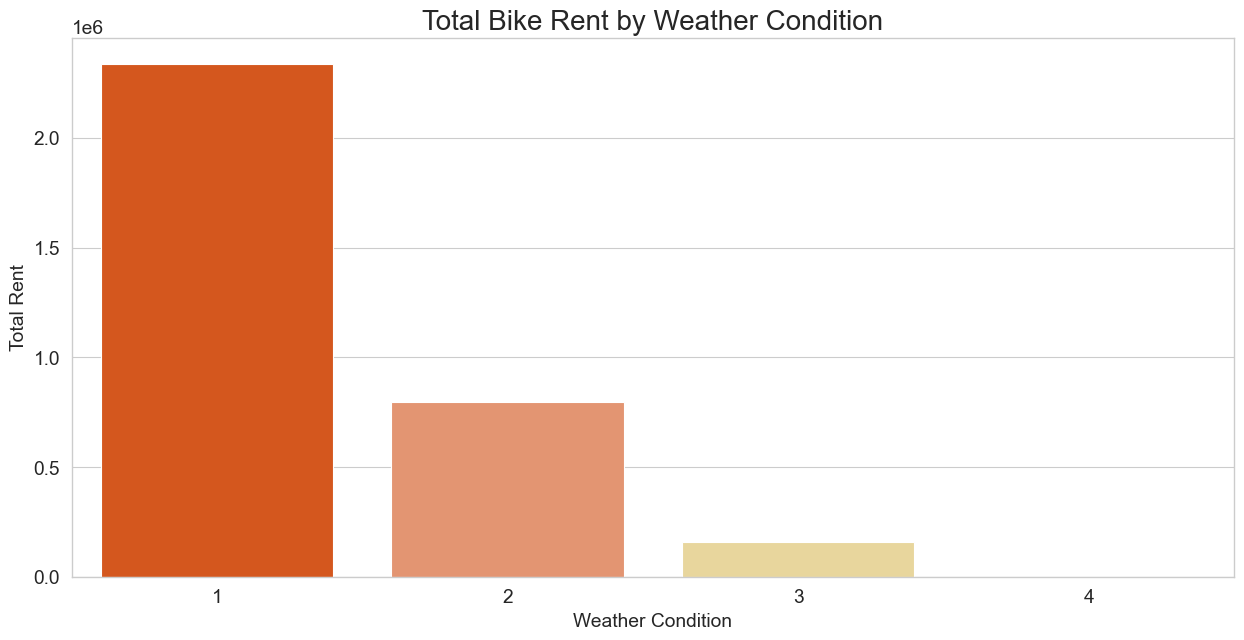

In [46]:
# membuat barplot untuk menampilkan total sewa sepeda berdasarkan kondisi cuaca
sns.barplot(data= hour_df.groupby(by="weather_condt").agg({
            "total_count": "sum"
            }).reset_index(),
            x='weather_condt',
            y='total_count',
            palette=('#F24C00', '#F68E5F', '#F5DD90', '#485696')
)

plt.title("Total Bike Rent by Weather Condition", loc="center", fontsize=20)
plt.xlabel("Weather Condition")
plt.ylabel("Total Rent")
plt.tick_params(axis='x')
plt.tick_params(axis='y')

plt.show()

### Pertanyaan 3:
Apakah terdapat pola penyewaan sepeda yang berbeda antara musim semi, musim panas, musim gugur, dan musim dingin?

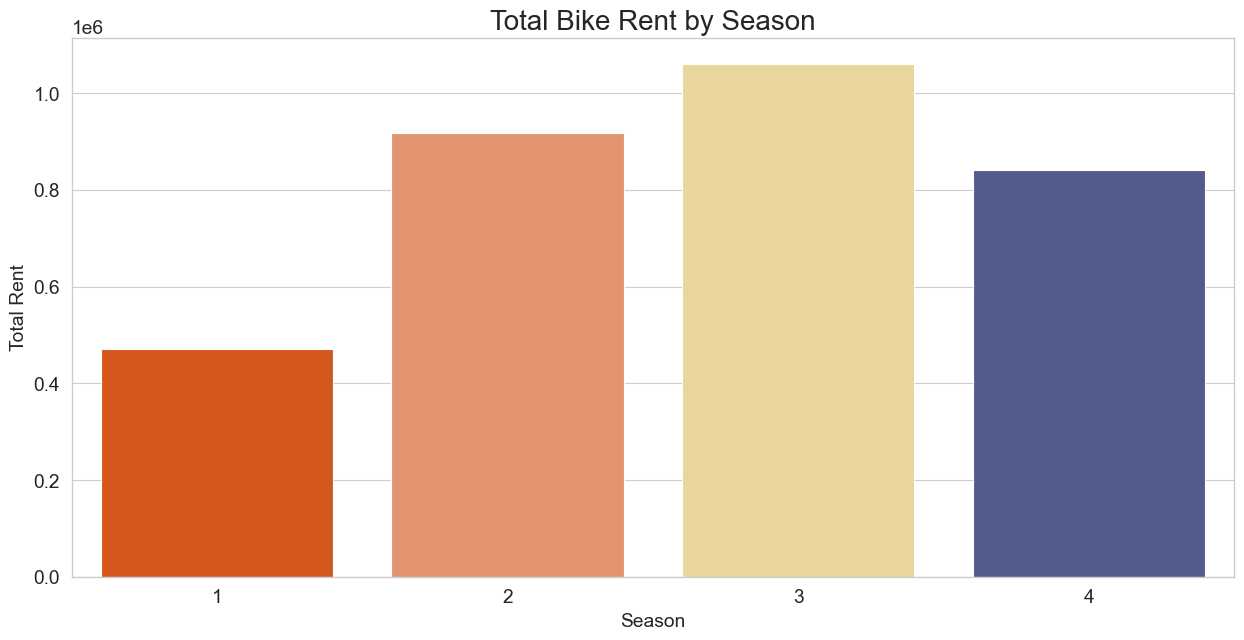

In [47]:
# membuat barplot untuk menampilkan total sewa sepeda berdasarkan musim
sns.barplot(data= hour_df.groupby(by="season").agg({
            "total_count": "sum"
            }).reset_index(),
            x='season',
            y='total_count',
            palette=('#F24C00', '#F68E5F', '#F5DD90', '#485696')
)

plt.title("Total Bike Rent by Season", loc="center", fontsize=20)
plt.xlabel("Season")
plt.ylabel("Total Rent")
plt.tick_params(axis='x')
plt.tick_params(axis='y')

plt.show()

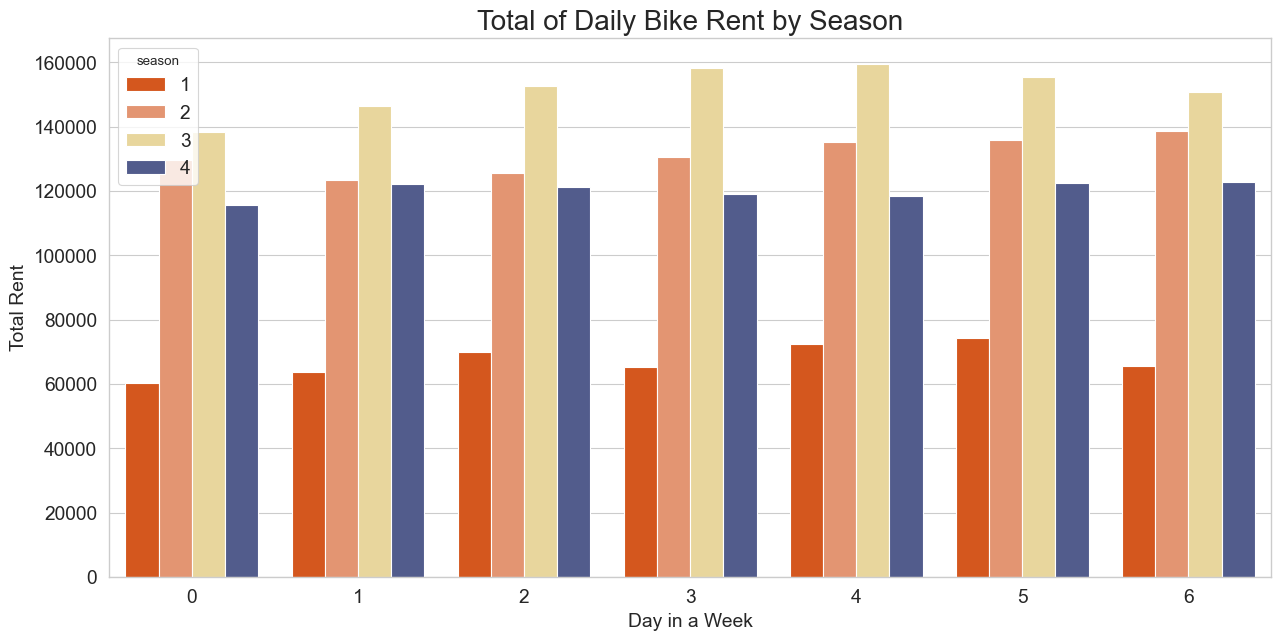

In [48]:
# membuat barplot untuk menampilkan total sepeda berdasarkan musim dan hari
sns.barplot(data= hour_df.groupby(by=[hour_df.is_weekday.astype(str), hour_df.season.astype(str)]).agg({
            "total_count": "sum"
            }).reset_index(),
            x='is_weekday',
            y='total_count',
            hue='season',
            palette=('#F24C00', '#F68E5F', '#F5DD90', '#485696')
)

plt.title("Total of Daily Bike Rent by Season", loc="center", fontsize=20)
plt.xlabel("Day in a Week")
plt.ylabel("Total Rent")
plt.tick_params(axis='x')
plt.tick_params(axis='y')

plt.show()

Text(0, 0.5, 'Total Rent')

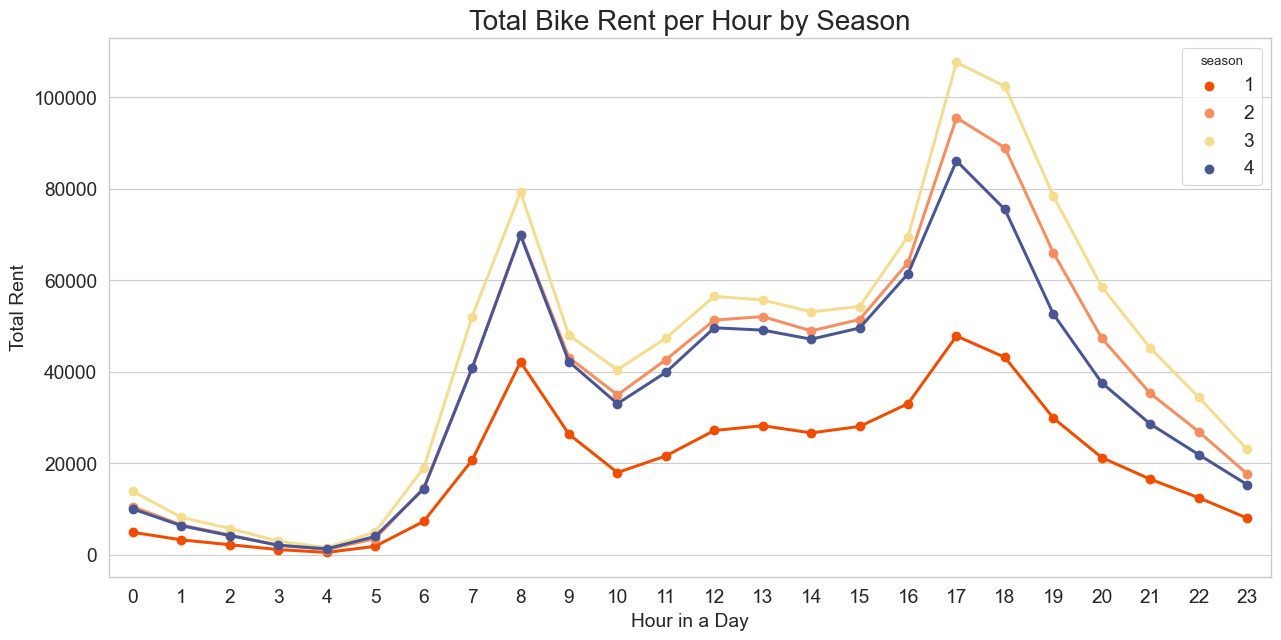

In [49]:
# membuat subplot dan sumbu
fig,ax = plt.subplots()

#membuat pointplot untuk menunjukkan total sewa sepeda per jam pada setiap musim
sns.pointplot(data=hour_df.groupby(by=[hour_df['hour'], hour_df['season']]).agg({
                "total_count": "sum"
                }).reset_index(),
              x='hour',
              y='total_count',
              hue='season',
              palette=('#F24C00', '#F68E5F', '#F5DD90', '#485696'),
              ax=ax)

ax.set_title('Total Bike Rent per Hour by Season', size=20)
ax.set_xlabel('Hour in a Day')
ax.set_ylabel('Total Rent')

### Analisis Lanjutan:
Bagaimana hubungan antara kondisi lingkungan dengan total sewa sepeda?

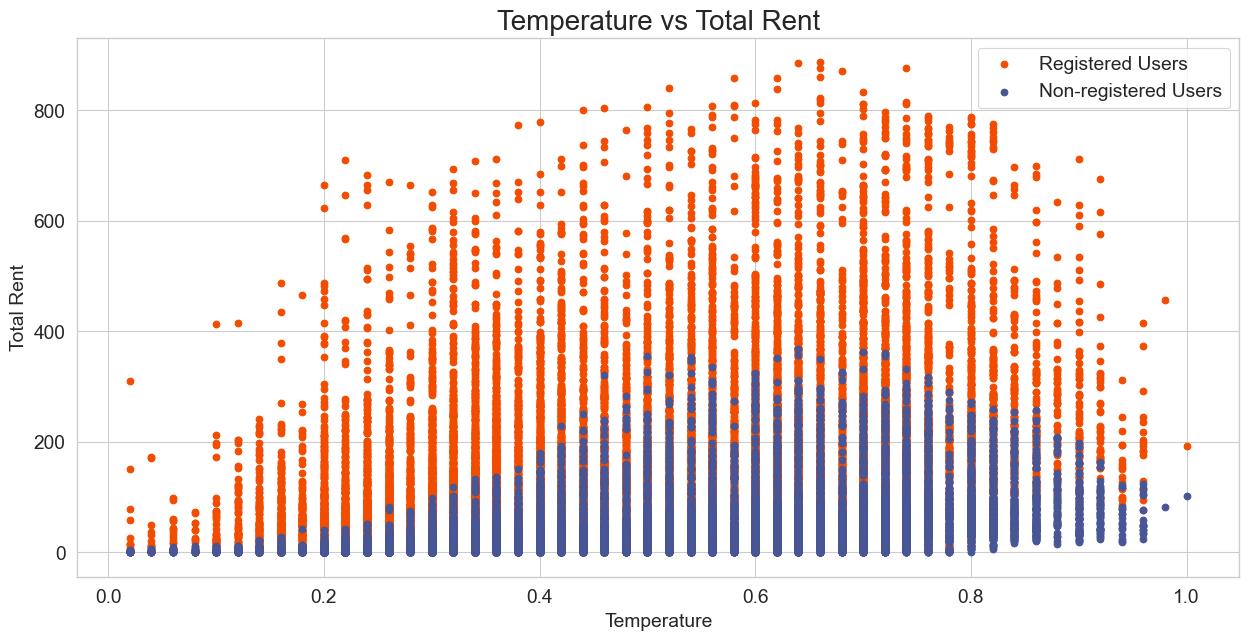

In [52]:
# membuat scatterplot untuk menunjukkan hubungan temperatur dengan total sewa berdasarkan kategori penyewa
plt.scatter(hour_df['temp'], hour_df['registered'], label='Registered Users', color='#F24C00')
plt.scatter(hour_df['temp'], hour_df['casual'], label='Non-registered Users', color='#485696')

plt.title('Temperature vs Total Rent', size=20)
plt.xlabel('Temperature')
plt.ylabel('Total Rent')
plt.legend()

plt.grid(True)
plt.show()

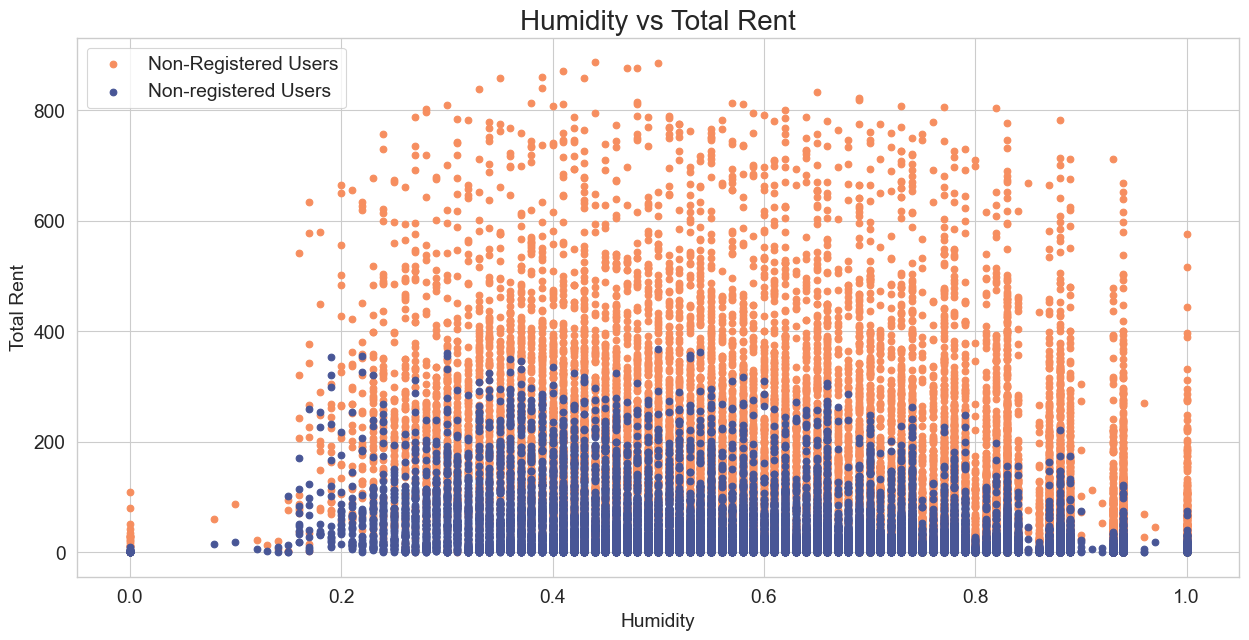

In [53]:
# membuat scatterplot untuk menunjukkan hubungan kelembapan udara dengan total sewa berdasarkan kategori penyewa
plt.scatter(hour_df['humid'], hour_df['registered'], label='Non-Registered Users', color='#F68E5F')
plt.scatter(hour_df['humid'], hour_df['casual'], label='Non-registered Users', color='#485696')

plt.title('Humidity vs Total Rent', size=20)
plt.xlabel('Humidity')
plt.ylabel('Total Rent')
plt.legend()

plt.grid(True)
plt.show()

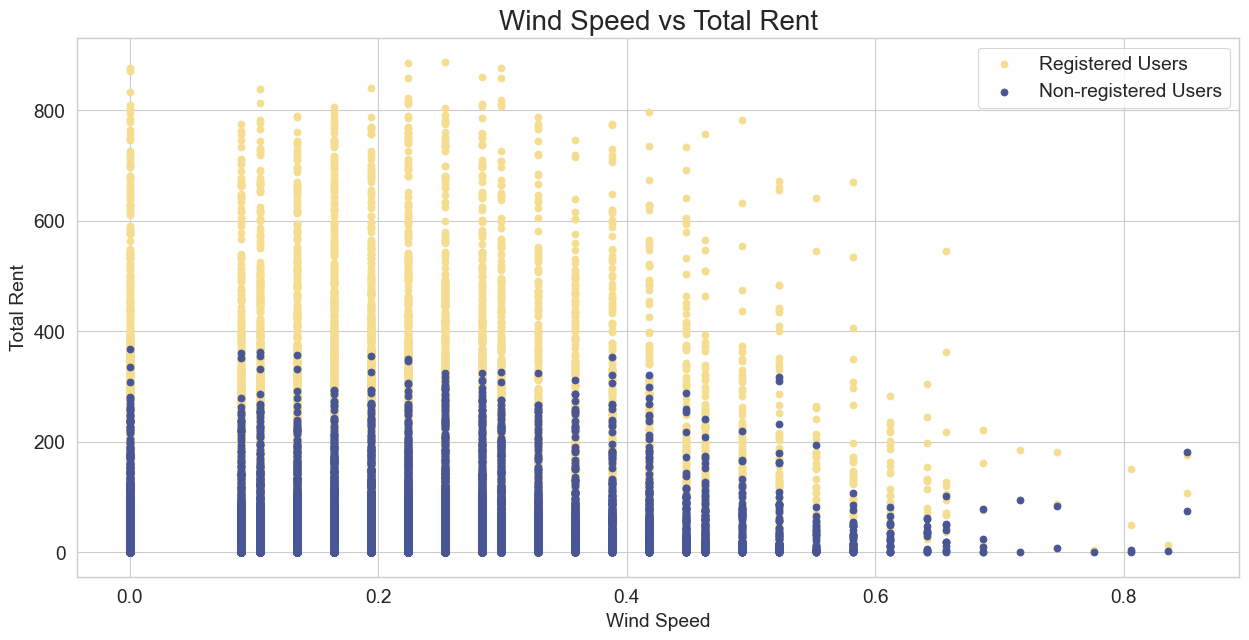

In [54]:
# membuat scatterplot untuk menunjukkan hubungan kelembapan udara dengan total sewa berdasarkan kategori penyewa
plt.scatter(hour_df['wind_speed'], hour_df['registered'], label='Registered Users', color='#F5DD90')
plt.scatter(hour_df['wind_speed'], hour_df['casual'], label='Non-registered Users', color='#485696')

plt.title('Wind Speed vs Total Rent', size=20)
plt.xlabel('Wind Speed')
plt.ylabel('Total Rent')
plt.legend()

plt.grid(True)
plt.show()

#### Uji Korelasi

Hipotesis:
* $H0: \rho=0$ (tidak terdapat korelasi, variabel independen)
* $H1: \rho≠ 0$ (terdapat korelasi positif atau negatif)

H0: ditolak apabila _p-value_ < 0.05

In [55]:
# menghitung nilai korelasi 
correlation_matrix = hour_df[['temp', 'humid', 'wind_speed', 'total_count']].corr()
print("Matrix Korelasi:")
print(correlation_matrix)

Matrix Korelasi:
                 temp     humid  wind_speed  total_count
temp         1.000000 -0.069881   -0.023125     0.404772
humid       -0.069881  1.000000   -0.290105    -0.322911
wind_speed  -0.023125 -0.290105    1.000000     0.093234
total_count  0.404772 -0.322911    0.093234     1.000000


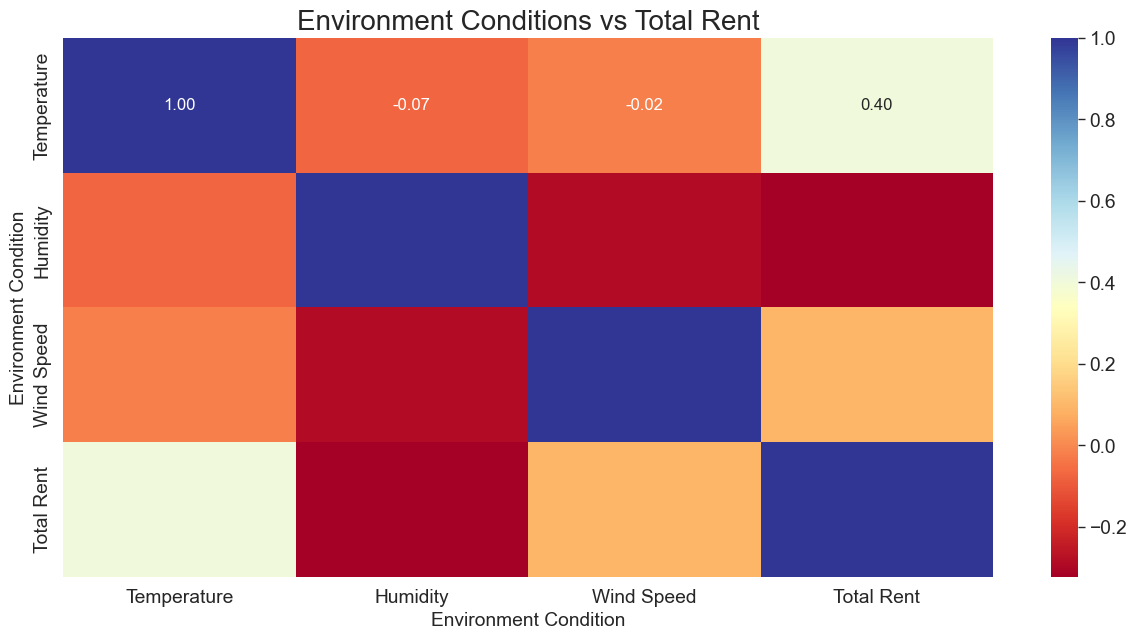

In [56]:
# mengganti nama variabel kondisi lingkungan dan total sewa pada heatmap
corr_renamed = correlation_matrix.rename(columns={'temp': 'Temperature',
                                    'humid': 'Humidity',
                                    'wind_speed': 'Wind Speed',
                                    'total_count': 'Total Rent'}, 
                            index={'temp': 'Temperature',
                                   'humid': 'Humidity',
                                   'wind_speed': 'Wind Speed',
                                   'total_count': 'Total Rent'}
)
# membuat heatmap untuk menampilkan korelasi antar variabel kondisi lingkungan terhadap total sewa
sns.heatmap(corr_renamed, annot=True, cmap='RdYlBu', fmt=".2f", annot_kws={"size": 12})
plt.title('Environment Conditions vs Total Rent', size=20)
plt.xlabel('Environment Condition')
plt.ylabel('Environment Condition')

plt.show()

## Conclusion

### Kesimpulan Pertanyaan 1:
- Secara keseluruhan, persentase jumlah **penyewa non-registrasi** sebesar **18,83%** atau sebanyak **620.017** penyewa. Sedangkan, persentase jumlah **penyewa terregristrasi** jauh lebih banyak, yaitu sebesar **81,17%** atau sebanyak **2.672.662** penyewa dari total keseluruhan penyewa.
- Terdapat **kecenderungan pola tren yang sama** antara jumlah **penyewa sepeda non-regristrasi** dengan jumlah **penyewa sepeda terregristrasi**, yaitu pada waktu kenaikan dan penurunan penyewaannya. Terjadi **kenaikan jumlah penyewaan sepeda** pada rentang bulan **Maret hingga September** dan terjadi **penurunan jumlah penyewaan sepeda** pada rentang bulan **Oktober hingga Desember** setiap tahunnya.



### Kesimpulan Pertanyaan 2:
- Kondisi cuaca memengaruhi jumlah penyewaan sepeda, dapat terlihat bahwa kondisi cuaca **1 (cerah, sedikit awan, sebagian berawan)** memiliki jumlah penyewaan sepeda terbanyak dengan total **2.338.175** kali sewa, dilanjutkan dengan kondisi cuaca **2 (kabut + mendung, kabut+ awan pecah, kabut + sedikit awan, kabut)** sebanyak **795.952** kali sewa, lalu kondisi cuaca **3 (salju ringan, hujan ringan + badai petir + awan berserakan, hujan ringan + awan berserakan)** sebanyak **158.331** kali sewa, dan di urutan terakhir terdapat kondisi cuaca **4 (hujan lebat + hujan es + badai petir + kabut, salju + kabut)** yang hanya disewa sebanyak **223** kali sewa.

### Kesimpulan Pertanyaan 3:
- **Musim gugur** menduduki musim dengan **total penyewaan terbanyak**, yaitu sebanyak **1.061.129** kali sewa, dilanjutkan dengan **musim panas** sebanyak **918.589** kali sewa, **musim dingin** sebanyak **841.613** kali sewa, dan **musim semi** sebanyak **471.348** kali sewa.
- Pada **musim semi**, **total sewa sepeda** dari yang **terbanyak** secara berurutan terjadi pada **hari Jumat dan Kamis**; pada **musim panas** terjadi pada **hari Sabtu, Jumat, dan Kamis**; lalu pada **musim gugur** terjadi pada **hari Jumat dan Kamis**; dan terakhir pada **musim dingin** terjadi pada **hari Sabtu, Jumat, dan Senin**.
- Saat ***weekday*** , yaitu hari Senin hingga Jum'at terjadi **peningkatan** jumlah penyewaan sepeda yang signifikan pada pagi hari pukul **06.00-08.00** dan kembali terjadi **penurunan** yang signifikan pada jam **09.00**, selanjutnya mengalami **peningkatan** yang signifikan pada sore hari pukul **15.00-17.00** dan kembali terjadi **penurunan** setelah pukul **18.00**. Sedangkan saat ***weekend***, yaitu hari Sabtu dan Minggu terjadi **peningkatan** jumlah penyewaan sepeda secara perlahan pada pagi hingga siang hari mulai pukul **06.00-12.00** dan kembali terjadi **penurunan** secara perlahan setelah pukul **16.00**.

### Kesimpulan Uji Korelasi:
- Hasil **uji korelasi** menunjukan bahwa $\rho≠ 0$ sehingga H0 ditolak. Artinya, semua variabel kondisi lingkungan, yaitu temperatur, kelembapan udara, dan kecepatan angin **berkorelasi dengan total sewa**.
- Berdasarkan perhitungan nilai korelasinya, **ketiga variabel kondisi lingkungan** memiliki **pengaruh yang tidak signifikan terhadap total sewa sepeda**. Dapat terlihat bahwa nilai korelasi antara **temperatur dengan total sewa** sebesar **0.40** yang berarti terdapat **korelasi positif yang lemah**, nilai korelasi antara **kelembapan udara dengan total sewa** sebesar **-0.32** yang berarti terdapat **korelasi negatif yang lemah**, dan kemudian, nilai korelasi antara **kecepatan angin dengan total sewa** hanya sebesar **0.09** yang berarti terdapat **korelasi positif yang lemah**.

In [33]:
hour_df.to_csv('bike_sharing_hour.csv', index=False)